In [1]:
!pip install prophet

     ---------------------------------------- 0.0/46.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/46.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/46.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/46.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/46.4 kB ? eta -:--:--
     -------- ------------------------------- 10.2/46.4 kB ? eta -:--:--
     ---------------- --------------------- 20.5/46.4 kB 131.3 kB/s eta 0:00:01
     ---------------- --------------------- 20.5/46.4 kB 131.3 kB/s eta 0:00:01
     ------------------------- ------------ 30.7/46.4 kB 119.8 kB/s eta 0:00:01
     -------------------------------------- 46.4/46.4 kB 178.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 1.4 MB/s eta 0:00:10
   ---------------------------------------- 0.0/13.3 MB 1.4 MB/s eta 0:00:10
   --------------------

In [2]:
# STEP 1: Import libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [4]:
# STEP 2: Load dataset
df = pd.read_csv(r"C:\Users\Mritunjoy Paul\CSV files\Sample - Superstore.csv", encoding='latin1')
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
# STEP 3: Feature Engineering
df['Month'] = df['Order Date'].dt.strftime('%b')
df['Month_Num'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Month-Year'] = df['Order Date'].dt.to_period('M')
df['DayOfWeek'] = df['Order Date'].dt.dayofweek
df['Week'] = df['Order Date'].dt.isocalendar().week

In [7]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Month,Month_Num,Year,Month-Year,DayOfWeek,Week
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,Nov,11,2016,2016-11,1,45
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,Nov,11,2016,2016-11,1,45
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,Jun,6,2016,2016-06,6,23
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,Oct,10,2015,2015-10,6,41
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,Oct,10,2015,2015-10,6,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,25.2480,3,0.20,4.1028,Jan,1,2014,2014-01,1,4
9990,9991,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,91.9600,2,0.00,15.6332,Feb,2,2017,2017-02,6,8
9991,9992,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,258.5760,2,0.20,19.3932,Feb,2,2017,2017-02,6,8
9992,9993,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,29.6000,4,0.00,13.3200,Feb,2,2017,2017-02,6,8


In [8]:
# STEP 4: Aggregate daily sales
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales.columns = ['ds', 'y']

In [9]:
# STEP 5: Prophet Forecasting
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(daily_sales)

10:53:29 - cmdstanpy - INFO - Chain [1] start processing
10:53:36 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
# STEP 6: Make future predictions
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

In [11]:
# STEP 7: Merge actual + forecast
merged = pd.merge(daily_sales, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='outer')
merged.sort_values('ds', inplace=True)

In [12]:
# STEP 8: Top-selling products
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

In [13]:
# STEP 9: Monthly average sales
monthly_avg = df.groupby(df['Order Date'].dt.month)['Sales'].mean().reset_index()
monthly_avg.columns = ['Month_Num', 'Avg_Sales']
monthly_avg['Month'] = monthly_avg['Month_Num'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))

In [14]:
# STEP 10: Export to CSV (use for Power BI)
merged.to_csv("sales_forecast.csv", index=False)
top_products.to_csv("top_products.csv", index=False)
monthly_avg.to_csv("monthly_avg_sales.csv", index=False)

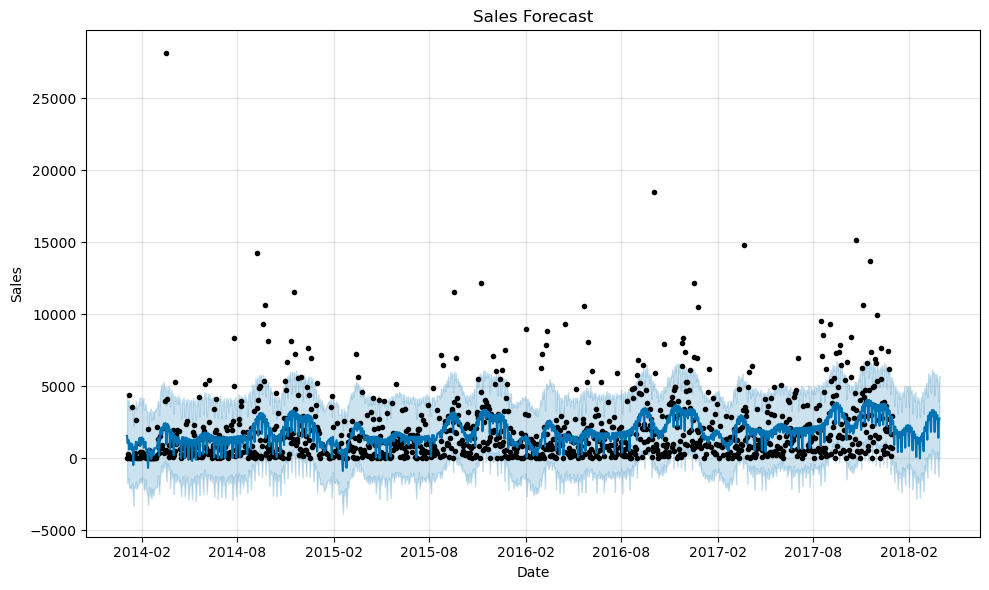

In [15]:
# STEP 11: Plot forecast
model.plot(forecast)
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

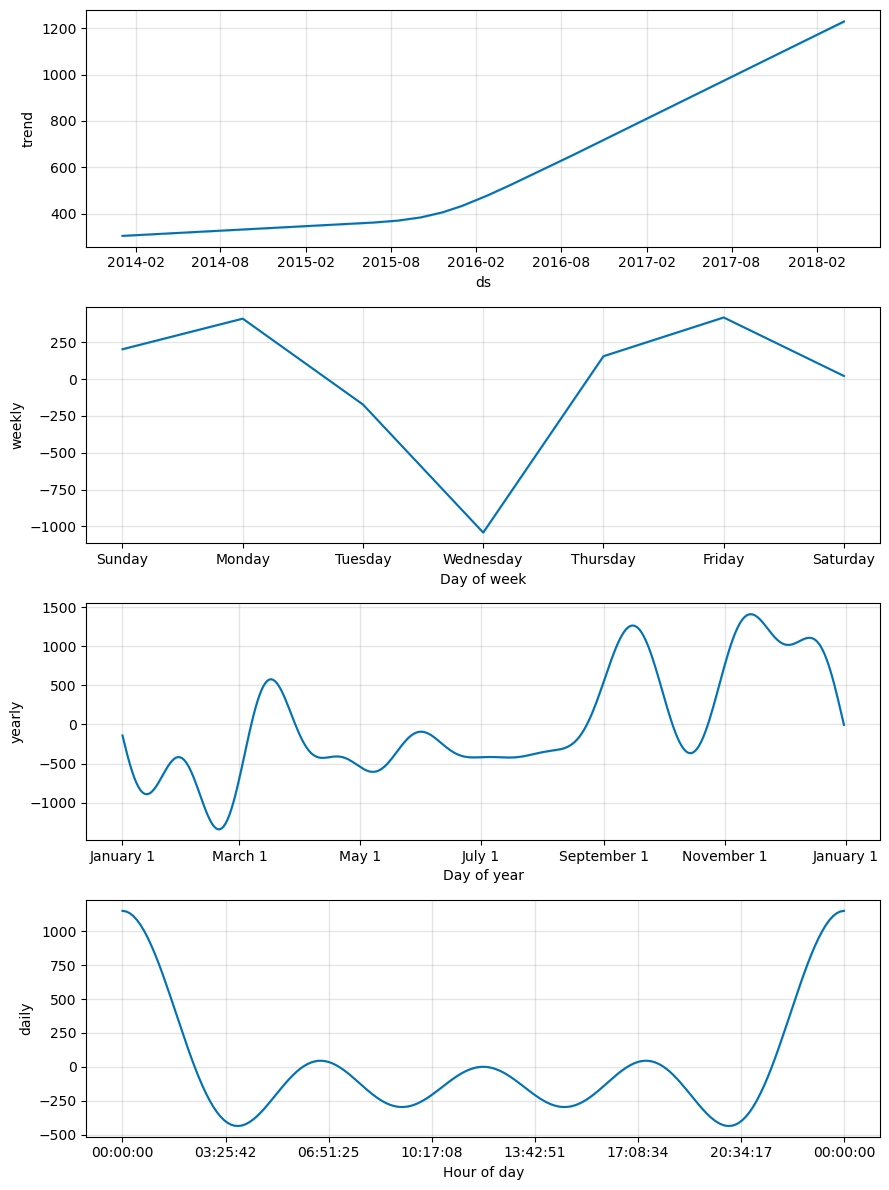

In [16]:
# STEP 12: Plot components
model.plot_components(forecast)
plt.tight_layout()
plt.show()